In [15]:
%pylab inline
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import brewer2mpl

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
# create fROI, extract FIR timeseries, write to dataframe
#!. /home/despoB/kaihwang/bin/TDSigEI/make_indiv_fROI.sh
#!. /home/despoB/kaihwang/bin/TDSigEI/extract_FIR_ts.sh


In [151]:
cd /home/despoB/kaihwang/bin/TDSigEI/ROIs

/home/despoB/kaihwang/bin/TDSigEI/ROIs


In [152]:
%run dataframe_FIR.py

In [153]:
cd /home/despoB/kaihwang/bin/TDSigEI

/home/despoB/kaihwang/bin/TDSigEI


In [154]:
#load dataframe, calculate mean and SEM
FIR_df = pd.read_csv('Data/FIR_df.csv')

mean_df = FIR_df.groupby(['ROI','Condition','Volume']).mean().reset_index()
sem_df = FIR_df.groupby(['ROI','Condition','Volume']).sem().reset_index()


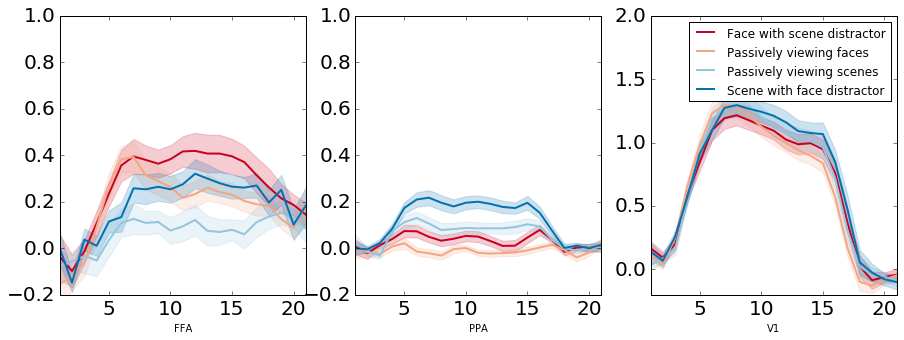

In [161]:
#conditions
plt.rc('xtick', labelsize=20)  
plt.rc('ytick', labelsize=20) 
ROIs = ['FFA', 'PPA', 'V1']
Conditions =['FH', 'Fp', 'Hp', 'HF']
Labels = ['Face with scene distractor', 'Passively viewing faces ', 'Passively viewing scenes', 'Scene with face distractor']
x = np.arange(1,22)
#get colormap
cmap = brewer2mpl.get_map('RdBu','diverging', 4)
plt.figure(1)
plt.figure(figsize=(15,5))
for r, roi in enumerate(ROIs):
    plt.subplot(1, 3, r+1)
    
    for i, c in enumerate(Conditions):
        y = np.array(mean_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        error = np.array(sem_df[(mean_df['ROI'] == roi) & (mean_df['Condition'] == c)]['Beta'])
        plt.plot(x, y, color = cmap.hex_colors[i], linewidth=2  )
       
        plt.fill_between(x, y-1*error, y+1*error, alpha=0.2, edgecolor=cmap.hex_colors[i], 
                     facecolor=cmap.hex_colors[i], label=c)
        if roi == 'V1':
            plt.ylim(-0.2, 2)
        else:
            plt.ylim(-0.2, 1)
        plt.xlim(1, 21)
        plt.xlabel(roi)
plt.legend(Labels)
plt.show()
#avefig('/home/despoB/kaihwang/bin/TDSigEI/FIR_estimates.jpg')


In [130]:

FFF=FIR_df.groupby(['Subj','Condition'])['Beta'].mean()


In [131]:
FIR_df['Condition']=='FH'

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
7026    False
7027    False
7028    False
7029    False
7030    False
7031    False
7032    False
7033    False
7034    False
7035    False
7036    False
7037    False
7038    False
7039    False
7040    False
7041    False
7042    False
7043    False
7044    False
7045    False
7046    False
7047    False
7048    False
7049    False
7050    False
7051    False
7052    False
7053    False
7054    False
7055    False
Name: Condition, dtype: bool

In [149]:
ABC=FIR_df[FIR_df['Condition']=='Hp'].groupby(['Subj','ROI']).mean().reset_index()

In [150]:
ABC[ABC['ROI']=='PPA']['Beta'][0:]

1     0.054755
3     0.157689
5     0.037391
7     0.194704
9     0.023066
11    0.196513
13    0.278679
15    0.043606
17    0.036173
19    0.001986
21   -0.047326
23    0.099883
25    0.112526
27    0.181661
29    0.065283
31   -0.012349
33   -0.073305
35    0.033271
37    0.096309
39    0.000344
41    0.043483
43   -0.004097
45   -0.025601
47    0.000172
49    0.061518
51    0.144832
53    0.017191
55   -0.065853
Name: Beta, dtype: float64